In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
from sotodlib import core
nersc_todsims = '/global/project/projectdirs/sobs/todsims/pipe-s0001/v4/context.yaml'
context = core.Context(nersc_todsims)
path = 'output/test/'

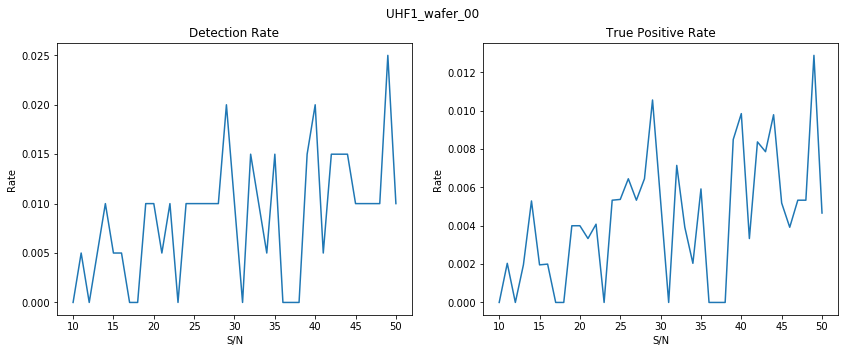

In [61]:
#det_set = 'LF1_tube_LT6'
#det_set = 'LF2_tube_LT6'
#det_set = 'MFF1_wafer_13'
#det_set = 'MFF2_wafer_13'
#det_set = 'MFS1_wafer_26'
#det_set = 'MFS2_wafer_26'
det_set = 'UHF1_wafer_00'
#det_set = 'UHF2_wafer_00'

DR = np.array(pd.read_csv(path + 'DR_%s.csv' %det_set))
TPR = np.array(pd.read_csv(path + 'TPR_%s.csv' %det_set))

detdb = context.detdb.props(props=['fcode','band']).distinct()
freq_band = detdb['band']
S_Ns = np.arange(10, 51, 1)


# statistic of one det set
plt.figure(figsize=(14,5))
plt.suptitle('%s ' %det_set)

plt.subplot(1,2,1)
plt.title('Detection Rate')
plt.plot(S_Ns, DR.mean(axis=0))
plt.ylabel('Rate')
plt.xlabel('S/N')

plt.subplot(1,2,2)
plt.title('True Positive Rate')
plt.plot(S_Ns, TPR.mean(axis=0))
plt.ylabel('Rate')
plt.xlabel('S/N')

plt.savefig('output/test/%s.png' %(det_set))

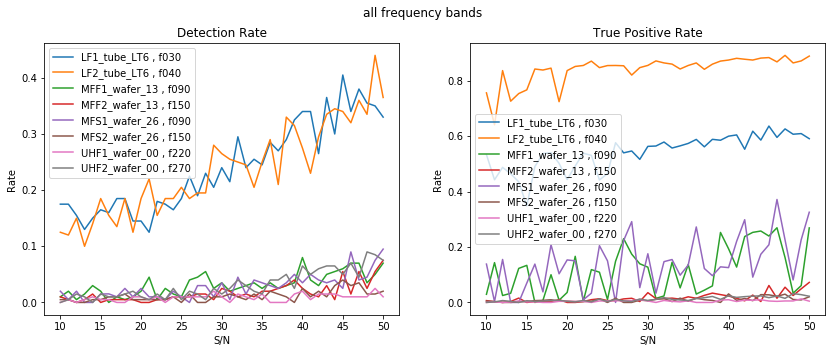

In [62]:
dets = {'LF1_tube_LT6': 'f030', 'LF2_tube_LT6': 'f040', 'MFF1_wafer_13': 'f090', 'MFF2_wafer_13': 'f150', 'MFS1_wafer_26':'f090', 'MFS2_wafer_26':'f150', 'UHF1_wafer_00': 'f220', 'UHF2_wafer_00': 'f270'}
plt.figure(figsize=(14,5))
plt.suptitle('all frequency bands')

# Plot Detetction Rate for different frequency bands
plt.subplot(1,2,1)
plt.title('Detection Rate')
plt.xlabel('S/N')
plt.ylabel('Rate')
for name, fb in dets.items():
    DR = np.array(pd.read_csv(path + 'DR_%s.csv' %(name)))
    plt.plot(S_Ns, DR.mean(axis=0), label=name+ ' , '+ fb)
    plt.legend()
    
# Plot True Positive Rate for different frequency bands
plt.subplot(1,2,2)
plt.title('True Positive Rate')
plt.xlabel('S/N')
plt.ylabel('Rate')
for name, fb in dets.items():
    TPR = np.array(pd.read_csv(path + 'TPR_%s.csv' %(name)))
    plt.plot(S_Ns, TPR.mean(axis=0), label=name+ ' , '+ fb)
    plt.legend()
    
plt.savefig(path + 'all.png')

In [57]:
detdb = context.detdb.props(props=['fcode','band']).distinct()
for i in detdb:
    print(i)
i['fcode']

OrderedDict([('fcode', 'f030'), ('band', 'LF1')])
OrderedDict([('fcode', 'f040'), ('band', 'LF2')])
OrderedDict([('fcode', 'f090'), ('band', 'MFF1')])
OrderedDict([('fcode', 'f090'), ('band', 'MFS1')])
OrderedDict([('fcode', 'f150'), ('band', 'MFF2')])
OrderedDict([('fcode', 'f150'), ('band', 'MFS2')])
OrderedDict([('fcode', 'f220'), ('band', 'UHF1')])
OrderedDict([('fcode', 'f270'), ('band', 'UHF2')])


'f270'